In [1]:
import seaborn as sns
sns.set_theme()

In [2]:
import numpy as np

data = np.loadtxt("./data.txt", delimiter=",")
data[:10, :]

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05]])

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

skmodel = Pipeline([
    ("scaler", ColumnTransformer([
        ("scale_x", StandardScaler(), slice(0, 1)),
        ("scale_y", StandardScaler(), slice(1, 2)),
    ])),
    ("regressor", LinearRegression()),
])

skmodel.fit(data[:, 0:2], data[:, 2:3])

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scale_x', StandardScaler(),
                                                  slice(0, 1, None)),
                                                 ('scale_y', StandardScaler(),
                                                  slice(1, 2, None))])),
                ('regressor', LinearRegression())])

In [4]:
skmodel.named_steps['regressor'].coef_

array([[109447.79646964,  -6578.35485416]])

In [38]:
skmodel.named_steps['regressor'].intercept_

array([340412.65957447])

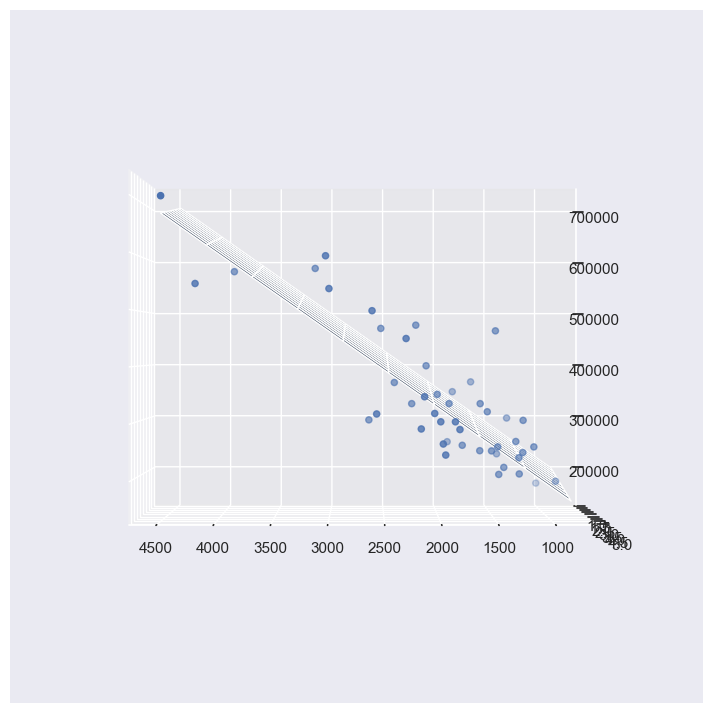

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')

X = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 10)
Y = np.linspace(np.min(data[:, 1]), np.max(data[:, 1]), 10)

Xv, Yv = np.meshgrid(X, Y)

features = np.hstack((Xv.reshape(-1, 1), Yv.reshape(-1, 1)))
Zv = skmodel.predict(features).reshape(10, 10)

ax.plot_surface(Xv, Yv, Zv)
ax.scatter(data[:, 0], data[:, 1], data[:, 2])

ax.view_init(elev=0, azim=90)

plt.show()

In [6]:
skmodel.predict(np.array([[1650, 3]]))

array([[293081.4643349]])

In [82]:
feature_scaler = ColumnTransformer([
    ("scale_x", StandardScaler(), slice(0, 1)),
    ("scale_y", StandardScaler(), slice(1, 2)),
])

scaled_features = feature_scaler.fit_transform(data[:, :2])
column_1 = np.repeat(np.array([[1]]), scaled_features.shape[0], axis=0)
X = np.hstack([scaled_features, column_1])
X[:5, :]

array([[ 0.13141542, -0.22609337,  1.        ],
       [-0.5096407 , -0.22609337,  1.        ],
       [ 0.5079087 , -0.22609337,  1.        ],
       [-0.74367706, -1.5543919 ,  1.        ],
       [ 1.27107075,  1.10220517,  1.        ]])

In [83]:
Y = data[:, 2:3]
Y[:5, :]

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.]])

In [84]:
from numpy.linalg import inv

W = inv(X.T @ X) @ X.T @ Y
W

array([[109447.79646964],
       [ -6578.35485416],
       [340412.65957447]])

In [86]:
scaled_features_to_predict = feature_scaler.transform(np.array([[1650, 3]]))
np.hstack([scaled_features_to_predict, np.array([[1]])]) @ W

array([[293081.4643349]])

$$
\frac{\partial E_\hat{w}}{\partial \hat{w}} = 2X^T(X\hat{w}-y)
$$

In [162]:
def calculate_gradient(X, y, w):
    return 2 * X.T @ (X @ w - y)

def calculate_error(X, y, w):
    Y_xw = y - X @ w
    return (Y_xw.T @ Y_xw)[0][0]

learning_rate = 0.01

# 初始值
w = np.zeros((3, 1))
w

array([[0.],
       [0.],
       [0.]])

In [163]:
trace = [calculate_error(X, Y, w)]
for i in range(64):
    gradient = calculate_gradient(X, Y, w)
    w -= gradient * learning_rate
    trace.append(calculate_error(X, Y, w))
w

array([[109447.79646964],
       [ -6578.35485416],
       [340412.65957447]])

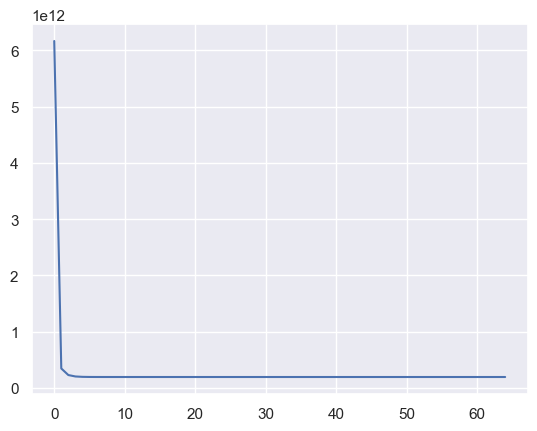

In [164]:
plt.plot(np.arange(len(trace)), trace)
plt.show()

In [165]:
np.hstack([scaled_features_to_predict, np.array([[1]])]) @ w

array([[293081.4643349]])